In [3]:
import numpy as np
import sys
import os 
from functools import partial                                                                           
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LightSource
from scipy.optimize import fmin
DATA_DIR = r"C:\Users\julia\VSCode\MSiD\data"

c:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Exercise 1
W metodzie stałokrokowej nie mamy gwarancji osiągnięcia minimum, gdyż przy stałym kroku możemy nawet przeskoczyć minimum lokalne 

In [38]:
def steepest_descent(func, gradient, learning_rate, start_point, stop_condition, write_to=None):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to):
            print(f"Reached stop condition at {next_point}, value = {func(next_point)}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point


def func(X):
    return np.sum(X ** 2)

def gradient(X):
    return X * 2

def L1_norm(X):
    return np.sum(np.abs(X))

def L2_norm(X):
    return np.sqrt(np.sum(X ** 2))

def stop(current_point, next_point, error, write_to=None):
    computed = L2_norm(current_point - next_point)
    print(f"L2 = {computed}", file=write_to) 
    return computed < error 


In [4]:
h_i = 0.3
x_start = np.array([4, 4])
with open(os.path.join(DATA_DIR, "ex1.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.0065536 0.0065536]) = 8.589934592000008e-05


In [5]:
v1 = np.array([3, 4])
v2 = np.array([1, 1])

# Subtraction is element-wise
v1 - v2

array([2, 3])

In [6]:
scipy_min = fmin(func, x0=x_start)
func(scipy_min)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 44
         Function evaluations: 80


9.503461544006107e-10

Exercise 2
Minimum tej funkcji znajduje się w punkcie (1, 1)

In [7]:
def func(X):
    return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2

def gradient(X):
    return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2, 
                     -5 * (X[0] ** 2 - X[1])])

h_i = 0.1
x_start = np.array([-0.5, 1])
with open(os.path.join(DATA_DIR, "ex2.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.1), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.43228954 0.07528693]) = 0.35342448875174604


In [8]:
h_i = 0.1
# Iteration 37
with open(os.path.join(DATA_DIR, "ex2_a.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

h_i = 0.01
with open(os.path.join(DATA_DIR, "ex2_b.txt"), mode='w') as f:
    result = steepest_descent(func, gradient, h_i, x_start, partial(stop, error=0.001), write_to=f)
    print(f"f({result}) = {func(result)}")

f([0.89834828 0.78934951]) = 0.011114539348035525
f([0.89761505 0.78790576]) = 0.011275402470144028


In [9]:
func(np.array([1, 2]))

2.5

In [10]:
scipy_min = fmin(func, x0=x_start)
func(scipy_min)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 109


2.3379829250198353e-10

W porównaniu z metodą zmiennokrokową, w metodzie stałokrokowej nie wykonujemy dodatkowych obliczeń, więc możemy więcej iteracji zrobić

Exercise 3

In [11]:
def var_steepest_descent(func, gradient, learning_rate, start_point, stop_condition, write_to=None):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate(current_point, gradient_value, write_to) * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to):
            print(f"Reached stop condition at {next_point}, value = {func(next_point):.2f}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point


def update_learning_rate(X, gradient, write_to=None):
    
    def metric(alpha):
        # This is original function
        return np.sum((X - alpha * gradient) ** 2)
    
    min_alpha = fmin(metric, x0=0.01, disp=False)
    print(f"\talpha = {min_alpha[0]:.2f}", file=write_to)
    return min_alpha[0]

W metodzie zmiennokrokowej wykonujemy optymalizację kierunkową współczynnika kroku. Tutaj wybieramy takie $\alpha$, by minimalizowało funkcję wejściową

In [12]:
update_learning_rate(np.array([4, 4]), np.array([8, 8]))

	alpha = 0.50


0.5000000000000007

Tutaj potrzebowaliśmy jednego kroku, by znaleźć minimum. 

In [13]:
def func(X):
    return np.sum(X ** 2)

def gradient(X):
    return X * 2

x_start = np.array([4, 4])
with open(os.path.join(DATA_DIR, "ex3.txt"), mode='w') as f:
    result = var_steepest_descent(func, gradient, update_learning_rate, x_start, partial(stop, error=0.01), write_to=f)
    print(f"f({result}) = {func(result)}")

f([-5.32907052e-15 -5.32907052e-15]) = 5.679798517591285e-29


Exercise 4

In [14]:
points = []

def var_steepest_descent_2(func, gradient, learning_rate, start_point, stop_condition, write_to=None,
                           max_iter=1000):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate(i, write_to) * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        points.append(next_point)
        print(f"\tnext_point = {next_point}", file=write_to)
        print(f"\tf({next_point}) = {func(next_point)}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to) or i == max_iter:
            print(f"Reached stop condition at {next_point}, value = {func(next_point):.2f}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point

In [15]:
def lr1(i, write_to=None):
    next_step = 0.0007 * i 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr2(i, write_to=None):
    next_step = 0.000701 * i 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr3(i, write_to=None):
    next_step = 0.03 * np.sqrt(i) 
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step

def lr4(i, write_to=None):
    next_step = 0.03* np.power(i, 1 / 4)
    print(f"\tnext step = {next_step:.2f}", file=write_to)
    return next_step


In [16]:
methods = [lr1, lr2, lr4]
names = ['a', 'b', 'd']

def func(X):
    return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2

def gradient(X):
    return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2, 
                     -5 * (X[0] ** 2 - X[1])])


x_start = np.array([-0.5, 1])

for method, name in zip(methods, names):
    with open(os.path.join(DATA_DIR, f"ex4{name}.txt"), mode='w') as f:
        result = var_steepest_descent_2(func, gradient, method, x_start, partial(stop, error=0.001), write_to=f)
        print(f"[{name}]: f({result}) = {func(result)}")

[a]: f([0.99054452 0.97963282]) = 9.537848629279827e-05
[b]: f([0.99059457 0.9797404 ]) = 9.436956874481766e-05
[d]: f([0.9889871  0.97629347]) = 0.00012940214379883423


In [17]:
x_start = np.array([-0.5, 1])

with open(os.path.join(DATA_DIR, f"ex4_c.txt"), mode='w') as f:
    result = var_steepest_descent_2(func, gradient, lr3, x_start, partial(stop, error=0.001), write_to=f,
                                        max_iter=300)
    print(f"[{name}]: f({result}) = {func(result)}")

C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:5: RuntimeWarning: overflow encountered in double_scalars
  return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\2746051287.py:34: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(X ** 2))
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:8: RuntimeWarning: overflow encountered in double_scalars
  return np.array([10 * X[0] ** 3 - 10 * X[0] * X[1] + 2 * X[0] - 2,
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:9: RuntimeWarning: overflow encountered in double_scalars
  -5 * (X[0] ** 2 - X[1])])
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return 2.5 * (X[0] ** 2 - X[1]) ** 2 + (1 - X[0]) ** 2
C:\Users\julia\AppData\Local\Temp\ipykernel_9984\4056960687.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([10 * X[0

[d]: f([nan nan]) = nan


In [18]:
len(points)
points = np.array(points)

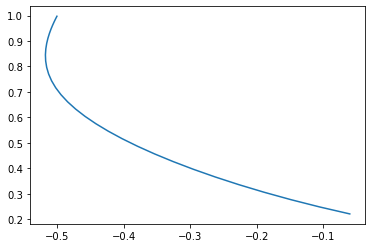

In [19]:
import matplotlib.pyplot as plt 

n_points = 33

plt.plot(points[:n_points, 0], points[:n_points, 1])

In [74]:
def steepest_descent_with_contraint(func, gradient, learning_rate, start_point,
                                     stop_condition, write_to=None, max_iter=1000):
    current_point = start_point
    i = 1
    while True:
        print(f"ITERATION {i}", file=write_to)
        gradient_value = gradient(current_point, i)
        print(f"\tgradient_value = {gradient_value}", file=write_to)
        step_size = learning_rate * gradient_value
        print(f"\tstep_size = {step_size}", file=write_to)
        next_point = current_point - step_size 
        print(f"\tnext_point = {next_point}", file=write_to)
        value = func(next_point, i)
        print(f"\tf({next_point}) = {value}", file=write_to)

        if stop_condition(current_point, next_point, write_to=write_to) or i == max_iter:
            print(f"Reached stop condition at {next_point}, value = {value}", file=write_to)
            break 
        i += 1
        current_point = next_point
    

    return current_point

def stop(current_point, next_point, error, write_to=None):
    computed = L2_norm(current_point - next_point)
    print(f"L2 = {computed}", file=write_to) 
    return computed < error 


In [75]:
class func:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)
        print(f'\tfunc c_{i} = {self._rate}', file=self.write_to)

    def __call__(self, x, i):
        value = (x + 1) * x * (x - 1) + self._rate * (max(0, (-x - 1)) ** 2 + max(0, (x - 1)) ** 2)
        self.update_rate(i)
        return value

class gradient:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)

    def is_feasible(self, x):
        return (-x - 1) <= 0 and (x - 1) <= 0

    def __call__(self, x, i):
        result = 3 * x ** 2 - 1
        if x == 1 or x == -1:
            return 0
        if not self.is_feasible(x):
            result += 2 * self._rate * (((-x -1) * (-1)) + ((x - 1)))
        self.update_rate(i)
        print(f'\tgrad c_{i} = {self._rate}', file=self.write_to)
        return result 

start_c = 0.6
# def update_rate(r, i):
  #   return 2 ** (i -1) * r

def update_rate(r, i):
    return i

with open(os.path.join(DATA_DIR, f"ex3_constraint2.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = -1.75
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)



-0.5879821200367064


Funkcja nie jest rozniczkowalna w x = - 1 ani w x = 1, ponieważ jest to punkt 'sklejenia'

In [79]:
start_c = 1
def update_rate(r, i):
    return i

with open(os.path.join(DATA_DIR, f"ex3_constraint.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = 0.7
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

0.7


In [81]:
class func:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)
        print(f'\tfunc c_{i} = {self._rate}', file=self.write_to)

    def __call__(self, x, i):
        value = (x + 3) * x * (x - 3) + self._rate * (max(0, (-x - 2)) ** 2 + max(0, (x - 2)) ** 2)
        self.update_rate(i)
        return value

class gradient:

    def __init__(self, rate, update_rate, write_to):
        self._rate = rate
        self._update_rate = update_rate
        self.write_to = write_to
    
    def update_rate(self, i):
        self._rate = self._update_rate(self._rate, i)

    def is_feasible(self, x):
        return (-x - 2) <= 0 and (x - 2) <= 0

    def __call__(self, x, i):
        result = 3 * x ** 2 - 9
        if x == 2 or x == -2:
            return 0
        if not self.is_feasible(x):
            result += 2 * self._rate * (((-x -2) * (-1)) + ((x - 2)))
        self.update_rate(i)
        print(f'\tgrad c_{i} = {self._rate}', file=self.write_to)
        return result 

In [84]:
start_c = 0.6
# def update_rate(r, i):
  #   return 2 ** (i -1) * r

def update_rate(r, i):
    return i

with open(os.path.join(DATA_DIR, f"ex4_constraint1.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = -0.75
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

with open(os.path.join(DATA_DIR, f"ex4_constraint2.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = 0
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

with open(os.path.join(DATA_DIR, f"ex4_constraint1.txt"), mode='w') as f:
    fun1 = func(start_c, update_rate, f)
    grad1 = gradient(start_c, update_rate, f)
    x_start = 0.75
    result = steepest_descent_with_contraint(fun1, grad1, 0.01, x_start, partial(stop, error=0.01), write_to=f,
                                        max_iter=300)
    print(result)

1.6345786125985085
1.63487788012431
1.6330162965566544


In [4]:
def steepest_descent(func, gradient, learning_rate, start_point, stop_condition):
    current_point = start_point
    i = 1
    results = []
    while True:
        gradient_value = gradient(current_point)
        step_size = learning_rate * gradient_value
        next_point = current_point - step_size 

        results.append((current_point, func(current_point)))

        if stop_condition(current_point, next_point):
            print(f"Reached stop condition at {next_point}, value = {func(next_point)}")
            break 
        i += 1
        current_point = next_point

    return results


def L2_norm(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


steepest_descent(lambda x: x ** 2, lambda x: 2 * x, learning_rate=0.01, start_point=10, stop_condition=lambda p1, p2: L2_norm(p1, p2) < 0.01)

Reached stop condition at 0.482960212434878, value = 0.2332505667951425


[(10, 100),
 (9.8, 96.04000000000002),
 (9.604000000000001, 92.23681600000002),
 (9.41192, 88.5842380864),
 (9.2236816, 85.07630225817857),
 (9.039207968000001, 81.70728068875471),
 (8.858423808640001, 78.47167237348003),
 (8.6812553324672, 75.36419414749021),
 (8.507630225817856, 72.37977205924958),
 (8.337477621301499, 69.5135330857033),
 (8.17072806887547, 66.76079717550945),
 (8.00731350749796, 64.11706960735928),
 (7.847167237348001, 61.578033650907855),
 (7.690223892601041, 59.139543518331905),
 (7.5364194147490196, 56.79761759500595),
 (7.385691026454039, 54.54843193824372),
 (7.237977205924959, 52.38831403348927),
 (7.0932176618064595, 50.3137367977631),
 (6.95135330857033, 48.32131282057168),
 (6.812326242398924, 46.40778883287704),
 (6.676079717550945, 44.57004039509511),
 (6.542558123199926, 42.80506679544934),
 (6.411706960735928, 41.10998615034955),
 (6.283472821521209, 39.482030698795704),
 (6.157803365090785, 37.918542283123394),
 (6.034647297788969, 36.416968008711706),

In [34]:
class GDCRegularization:

    def __init__(self, function, penalty_function, gradient, penalty_gradient, constraint,
                                         learning_rate, precision, max_iter=100, verbose=False):
        self.function = function
        self.penalty_function = penalty_function
        self.gradient = gradient
        self.penalty_gradient = penalty_gradient
        self.constraint = constraint
        self.learning_rate = learning_rate
        self.penalty_term = None 
        self.penalty_term_increase = None
        self.precision = precision
        self.max_iter = max_iter
        self.verbose = verbose

        self.function_value = 0.0
        self.penalty_value = 0.0
        self.value = 0.0
        self.gradient_value = 0.0 
        self.penalty_term = 0.0 
        self.current_point = None
        self.next_point = None 
        self.previous_point = None 

    def l2_norm(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))
    
    def sgd(self):

        self.j = 1

        while True:
            add_penalty = [not constr for constr in self.constraint(self.current_point)]

            self.function_value = self.function(self.current_point)
            self.penalty_value = self.penalty_term * self.penalty_function(self.current_point)
            self.value = self.function_value + self.penalty_value

            self.gradient_value = self.gradient(self.current_point) + self.penalty_term * sum([a * b for a, b in zip(add_penalty, self.penalty_gradient(self.current_point))])

            step_size = self.learning_rate * self.gradient_value
            self.next_point = self.current_point - step_size

            if self.verbose:
                print("\t", self.format())

            if self.l2_norm(self.current_point, self.next_point) < self.precision:
                break 
            self.j += 1
            self.current_point = self.next_point


    def train(self, penalty_term, penalty_term_increase, start_point):

        self.current_point = start_point
        self.penalty_term = penalty_term
        self.previous_point = start_point
        i = 1

        while True:

            # self.sgd()

            def grad(x):
                add_penalty = [not constr for constr in self.constraint(x)]
                return self.gradient(x) + self.penalty_term * sum([a * b for a, b in zip(add_penalty, self.penalty_gradient(x))]) 

            def func(x):
                self.function(x) + self.penalty_term * self.penalty_function(x)

            def stop(p1, p2):
                return self.l2_norm(p1, p2) < self.precision

            self.current_point, self.function_value = steepest_descent(func, grad, self.learning_rate, self.current_point, stop)[-1]
            
            print(self.format())
            
            yield self.current_point, self.function_value

            if self.l2_norm(self.current_point, self.previous_point) < self.precision:
                break 
            
            self.previous_point = self.current_point
            self.penalty_term = penalty_term_increase(**{'penalty_term': self.penalty_term, 'i': i})
            i += 1
        
        return self.current_point, self.function_value
        

    def format(self):
        self.current_point = np.round(self.current_point, 2)
        return f"F({self.current_point}) = {self.function_value} + {self.penalty_term} * {self.penalty_value} = {self.value}, \n\tg={self.gradient_value}, l2={self.l2_norm(self.current_point, self.next_point)}"


In [1]:
def L2_norm(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def solve_with_constraint(func, h, g, penalty, c, eps, start):
    results = []
    i = 1
    curr_x = start
    while True:

        def F(x):
            return func(x) + penalty * (sum((h_i ** 2 for h_i in h(x))) + sum(g_i ** 2 for g_i in g(x) if g_i > 0))

        min_x = fmin(F, start, disp=False)
        results.append((min_x, F(min_x)))
        if L2_norm(min_x, curr_x) < eps:
            break 
        i += 1
        curr_x = min_x
        penalty = c(**{'i': i, 'penalty': penalty})
    return results     


Input function is $$ f(x_1, x_2) = x_1^2 + x_2^2$$

with equality constraint $$ h(x_1, x_2) = x_1 + x_2 - 2 = 0$$

where the function to optimize, without constraint, will be $$ F_i(x_1, x_2) = f(x_1, x_2) + c_i (h(x_1, x_2))^2$$

and $ c_i = i, \ i = 1, ..$, with condition that $\lim_{i -> \infty} = \infty$

We can solve for this without GDC, but the solution should be close anyway

In [2]:
def func1(x):
    return np.sum(x ** 2)

def h(x):
    return ((np.sum(x) - 2) == 0,)

def penalty1(x):
    return (np.sum(x) - 2) ** 2

c_1 = 1 

def next_c(**kwargs):
    return 10 * kwargs['i']

lr = 0.01
precision = 0.01
start_point = np.array([0, 0])

results = solve_with_constraint(func1, h, lambda x: [], c_1, next_c, precision, start_point)
print(results)

start_point = np.array([-5, -5])

results = solve_with_constraint(func1, h, lambda x: [], c_1, next_c, precision, start_point)
print(results)

NameError: name 'np' is not defined

Input function is $$ f(x_1, x_2) = (x_1 - 1)(x_2 - 1)x_1x_2$$
under inequality constraint $$ g(x_1, x_2) = (x_1 - 1)^2 + x_2^2 - 1 \leq 0$$

The function to minimize is $$ F_i(x_1, x_2) = f(x_1, x_2) + max(0, g(x_1, x_2))^2$$

In [18]:
def func2(x):
    return (x[0] - 1) * (x[1] - 1) * x[0] * x[1]

def g(x):
    return (x[0] - 1) ** 2 + x[1] ** 2 - 1,

c_1 = 1 

def next_c(**kwargs):
    return 2 ** (kwargs['i'] - 1)

lr = 0.01
precision = 0.01
start_point = np.array([0, 1])

results = solve_with_constraint(func2, lambda x: [], g, c_1, next_c, precision, start_point)
print(results)

[(array([ 0.58855882, -0.91143631]), -0.42187499979454857), (array([ 0.58860136, -0.91145543]), -0.4218749377121321)]


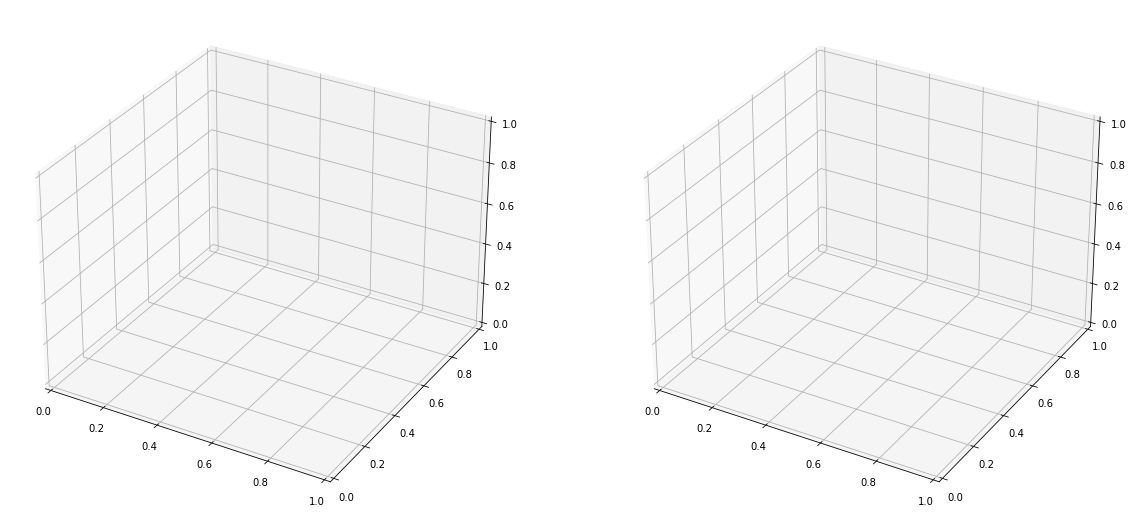

In [86]:
fig, ax = plt.subddplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(20, 10))

We have input function $$ f(x) = (x + 1)x(x - 1)$$
and constraints $$ g_1(x) = -x -1 \leq 0, g_2(x) = x -1 \leq 0$$

Function to minimize is $$ F_i(x) = f(x) + c_i(max(0, g_1(x))^2 + max(0, g_2(x))^2)$$

In [9]:
def func3(x):
    return (x + 1) * x * (x - 1)

def g(x):
    return -x - 1, x - 1

c_1 = 1
precision = 0.01

def next_c(**kwargs):
    return kwargs['i']

results = solve_with_constraint(func3, lambda x: [], g, c_1, next_c, precision, -1)
print(results)

results = solve_with_constraint(func3, lambda x: [], g, c_1, next_c, precision, -1.75)
print(results)

def next_c(**kwargs):
    return 100 ** kwargs['i']

results = solve_with_constraint(func3, lambda x: [], g, c_1, next_c, precision, -5)
print(results)

# wywala sie
# results = solve_with_constraint(func3, lambda x: [], constraint3, c_1, next_c, precision, -1.75)

[(array([-6.338253e+28]), array([-2.54629497e+86])), (array([-6.338253e+28]), array([-2.54629497e+86]))]
[(array([-1.10919428e+29]), array([-1.36465496e+87])), (array([-1.10919428e+29]), array([-1.36465496e+87]))]
[(array([-3.1691265e+29]), array([-3.18286871e+88])), (array([0.57733154]), array([-0.38490018])), (array([0.57733154]), array([-0.38490018]))]


In [25]:
# It should only punish for the first inequality
grad3(-1.75) + 2 * (-1.75 + 1)dd

6.6875

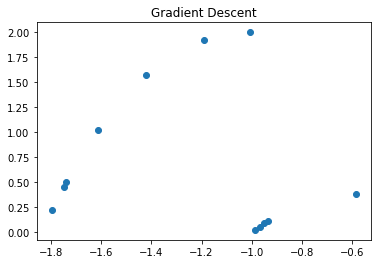

In [109]:
x, y = (zip(*results))
x, y = np.array(x), np.array(y)

plt.scatter(x, y)
_ = plt.title('Gradient Descent')

Input function is $$ f(x) = (x + 3)x(x - 3)$$ with constraints $$ g_1(x) = -x -2 \leq 0, g_1(x) = x -2 \leq 0$$ 

Function to minimize is $$ F_i(x) = f(x) + c_i(max(0, g_1(x))^2 + max(0, g_2(x))^2)$$

In [14]:
def func4(x):
    return (x + 3) * x * (x - 3)

def g(x):
    return -x - 2, x - 2

c_1 = 1
def next_c(**kwargs):
    return kwargs['i']

results = solve_with_constraint(func4, lambda x: [], g, c_1, next_c, precision, -1.75)
print(results)

results = solve_with_constraint(func4, lambda x: [], g, c_1, next_c, precision, -2)

print(results)

def next_c(**kwargs):
    return 100 ** kwargs['i']

results = solve_with_constraint(func4, lambda x: [], g, c_1, next_c, precision, -10)
print(results)

[(array([-1.10919428e+29]), array([-1.36465496e+87])), (array([-1.10919428e+29]), array([-1.36465496e+87]))]
[(array([-1.2676506e+29]), array([-2.03703598e+87])), (array([-1.2676506e+29]), array([-2.03703598e+87]))]
[(array([-6.338253e+29]), array([-2.54629497e+89])), (array([1.73205566]), array([-10.39230485])), (array([1.73205566]), array([-10.39230485]))]


### Minimum with Pareto method

If we have $f_i(x)$ functions, we can merge them together $$ F(x) = \sum_{i=0}^k \alpha_i f_i(x)$$ where $$ \sum_{i=0}^k \alpha_i = 1$$ 

In [ ]:
def are_coefficients_valid(alphas):
    return np.sum(alphas) == 1

def concat_functions(functions, alphas):
    
    def inner(x):
        func_values = [fun(x) for fun in functions]
        for i, fun_val in enumerate(func_values):
            print(f"a_i * f_i({x}) = {alphas[i]} * {fun_val} = {alphas[i] * fun_val}")
        return np.sum(func_values * alphas)
    return inner 
        